In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

data_url = './csicFinal.csv'
data = pd.read_csv(data_url)

# Drop de colunas contem os mesmos valores (redundantes)
redundant_columns = ['Pragma', 'Host-Header', 'Connection', 'Accept', 'Accept-Charset', 'Accept-Language', 'Cache-control']
for var in redundant_columns:
    data.drop(var, axis = 1, inplace = True)


# Remocao Cookies: Apos observar no terminal usando a funcao
# print(data['Cookie'].value_counts())
# Percebe-se que cada coluna contem um valor de cookie diferente.
# Como cada coluna tem um valor de Cookie diferente para cada uma, me parece mais ser um identificador
# Ou seja, uma variavel que nao ira ajudar em detectar ser uma anomalia ou nao, optando por remove-la
data.drop('Cookie', axis = 1, inplace = True)



In [5]:
# Conversao variaveis categoricas em numericas para
from sklearn.preprocessing import OneHotEncoder

one_hot_enconder_columns = OneHotEncoder()

# One Hot Enconder

# feature_array recebe matriz com a encodificacao one hot
columns_to_OHE = ["Method", "Host", "Class"]
feature_array = one_hot_enconder_columns.fit_transform(data[columns_to_OHE]).toarray()

# feature_labels recebe as categorias da matriz criada
feature_labels = one_hot_enconder_columns.categories_

# Concatena as categorias de todas as colunas
concatenated_categories = np.concatenate(feature_labels)

# DataFrame com as colunas de categorias + matriz de dados OHE
df_OHE = pd.DataFrame(feature_array, columns=concatenated_categories)

# Concatenacao dos dados com OHE
data_with_OHE = pd.concat([data, df_OHE], axis = 1)

# Colunas com valores string que serao descartados
string_columns = ["Content-Type", "URI", "POST-Data", "GET-Query"]
columns_to_drop = columns_to_OHE + string_columns + ["Anomalous"]

# Remocao das colunas com valores categoricos
for var in columns_to_drop:
    data_with_OHE.drop(var, axis = 1, inplace = True)

# Substituicao de valores NaN por 0
data_with_OHE.fillna(0, inplace=True)

# Count recebe quantidade de linhas que contem cada valor
count = data_with_OHE["Content-Length"].value_counts()

# Condicao recebe uma tabela com valores booleanos representando se a linha contem valor maior que N
condition = count.gt(500)

# data filtra valores que passaram na condicao
data_final = data_with_OHE[data_with_OHE["Content-Length"].isin(count.index[condition])]
data_final["Content-Length"].value_counts()

#for var in data_with_OHE.columns:
 #   display('Coluna analisada: ', var, data_with_OHE[var].unique(), '--------------------')


Content-Length
0.0     43088
4.0      1057
33.0     1054
17.0     1046
43.0      536
38.0      510
Name: count, dtype: int64

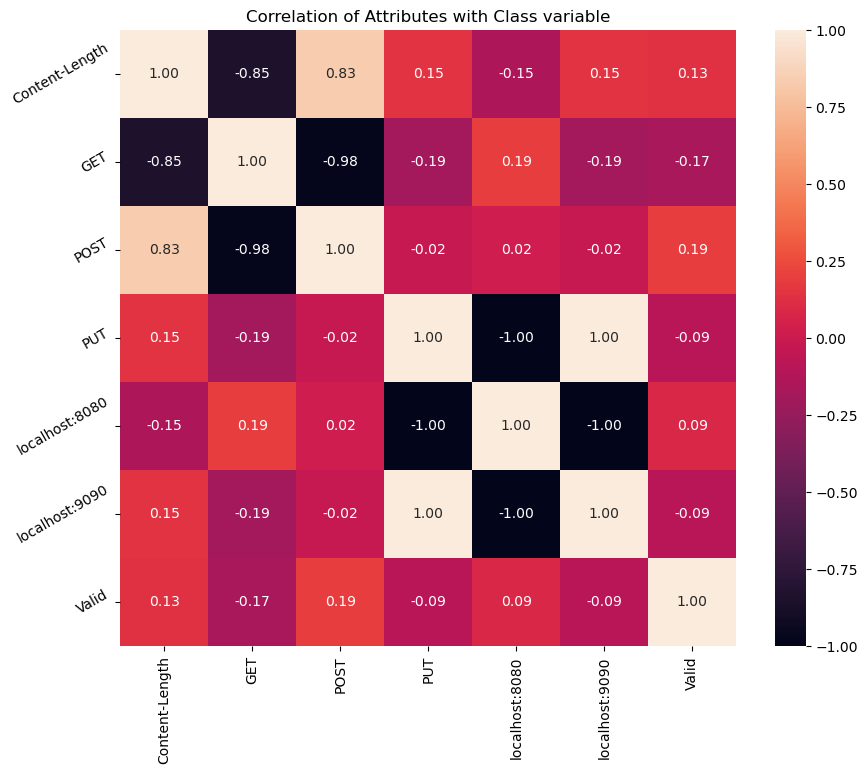

In [6]:
y_columns = ['Valid']
X = data_final.drop(y_columns, axis = 1)
y = data_final[y_columns]

correlation = data_final.corr()
correlation["Valid"].sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
                                                        #20% de dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [8]:
## Engenharia de features e feature scalling
# Identificar os valores nulos das features e estabelecer um valor de media para eles
# auxiliando no apredizado de maquina.
# Feature Scaling ira normalizar o intervalo dos recursos usados, tornado mais "uniformes"

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

y_predict

d:\ProgramFiles\Anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1., 1., 1., ..., 1., 1., 1.])

In [15]:
from sklearn.metrics import accuracy_score

print("Model accuracy score: {0:0.4f}" .format(accuracy_score(y_test, y_predict)))

Model accuracy score: 0.6732
